In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
import os
import PIL
from PIL import Image
import pathlib

In [3]:
## /Users/malikagolshan/Desktop/class_massive
from pathlib import Path
DATASET_PATH = pathlib.Path('/Users/malikagolshan/Desktop/class_massive')

In [4]:
import matplotlib.pyplot as plt

In [5]:
side_len = 128

In [6]:
train_gen = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z15',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False
)

valid_gen = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z15',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False
)

Found 26991 files belonging to 2 classes.
Using 21593 files for training.
Metal device set to: Apple M1


2022-07-17 21:06:15.072869: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-17 21:06:15.073248: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 26991 files belonging to 2 classes.
Using 5398 files for validation.


2022-07-17 21:06:15.461766: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-17 21:06:15.462909: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


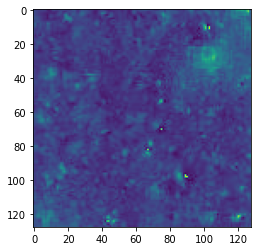

In [7]:
plt.imshow(np.squeeze(next(iter(valid_gen))[0][0]/255))

In [8]:
base_model = keras.applications.InceptionV3(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(side_len, side_len, 3),
    include_top=False) 

base_model.trainable = False

In [9]:
print("Model input shape: {}\n".format(base_model.input_shape))
print("Model output shape: {}\n".format(base_model.output_shape))
print("Model number of layers: {}\n".format(len(base_model.layers)))

Model input shape: (None, 128, 128, 3)

Model output shape: (None, 2, 2, 2048)

Model number of layers: 311



In [10]:
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

class Gray2VGGInput( Layer ) :
    
    """Custom conversion layer
    """
    def build( self, x ) :
        self.built = True
        return

    def call( self, x ) :
        rgb_x = K.concatenate( [x,x,x], axis=-1 )
        norm_x = rgb_x
        return norm_x

    def compute_output_shape( self, input_shape ) :
        return input_shape[:3] + (3,)

In [11]:
inputs          = keras.Input(shape=(side_len, side_len,1))
vgg_input_image = Gray2VGGInput( name='gray_to_rgb_norm')(inputs)
x               = vgg_input_image
scale_layer     = keras.layers.experimental.preprocessing.Rescaling(scale=1./255)

x = scale_layer(x)
x = base_model(x, training=False)
#x = Conv2D(3, (16, 16), activation="relu", padding='same')(x)
#x = Conv2D(64, (16, 16), activation="relu", padding='same')(conv_1)
#conv_1 = Conv2D(64, (16, 16), activation="relu", padding='same')(conv_1)
x = keras.layers.GlobalMaxPooling2D()(x)
#x = keras.layers.GaussianNoise(0.5)(x)
#x = keras.layers.Dense(8, activation='relu')(x)
outputs = keras.layers.Dense(1)(x)
model   = keras.Model(inputs, outputs)



In [12]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [13]:
model.predict(train_gen, steps=4)

2022-07-17 21:06:18.034007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[-1.7190001 ],
       [-0.27789065],
       [-2.646418  ],
       [-1.425208  ],
       [-1.4148033 ],
       [-1.1622968 ],
       [-0.41114798],
       [-1.2584935 ],
       [-1.3361182 ],
       [-1.8449839 ],
       [-0.18797457],
       [-0.9844705 ],
       [-1.2685366 ],
       [-1.1034274 ],
       [-1.181298  ],
       [-2.104089  ],
       [-0.51456904],
       [-0.8114687 ],
       [-1.0219936 ],
       [-1.7488732 ],
       [-0.8457507 ],
       [-1.1153634 ],
       [-1.3174181 ],
       [-1.143297  ],
       [-2.1209908 ],
       [-1.6628028 ],
       [-0.8911578 ],
       [-1.1941959 ],
       [-2.8008466 ],
       [-0.34485698],
       [-1.262326  ],
       [-1.3687997 ],
       [-0.9465789 ],
       [-1.1142764 ],
       [-0.7417139 ],
       [-1.7387857 ],
       [-1.6481593 ],
       [-2.0337844 ],
       [-1.8278209 ],
       [-1.4771057 ],
       [-0.53156984],
       [-0.8493896 ],
       [-0.89164525],
       [-1.4490489 ],
       [-1.5176623 ],
       [-1

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
gray_to_rgb_norm (Gray2VGGIn (None, 128, 128, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_____________________________________________

In [15]:
model.fit(train_gen, epochs=2, validation_data=valid_gen)

Epoch 1/2


2022-07-17 21:06:20.494154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


675/675 [==============================] - ETA: 0s - loss: 0.1762 - binary_accuracy: 0.9275

2022-07-17 21:07:47.553218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


675/675 [==============================] - 110s 160ms/step - loss: 0.1762 - binary_accuracy: 0.9275 - val_loss: 0.1455 - val_binary_accuracy: 0.9287
Epoch 2/2
675/675 [==============================] - 160s 237ms/step - loss: 0.1144 - binary_accuracy: 0.9559 - val_loss: 0.1068 - val_binary_accuracy: 0.9579


In [16]:
train_gen2 = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z16',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False
)

valid_gen2 = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z16',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False
)

Found 26969 files belonging to 2 classes.
Using 21576 files for training.
Found 26969 files belonging to 2 classes.
Using 5393 files for validation.


In [17]:
model.predict(train_gen2, steps=4)

array([[ 0.5591309 ],
       [ 3.9905157 ],
       [ 1.6212158 ],
       [-3.222051  ],
       [ 0.95595384],
       [-5.841067  ],
       [-2.2327473 ],
       [ 0.11734772],
       [ 7.118473  ],
       [ 1.5845001 ],
       [-6.7635922 ],
       [ 7.554838  ],
       [ 0.81400734],
       [ 6.994846  ],
       [ 6.680656  ],
       [-0.7754333 ],
       [-2.5536473 ],
       [ 2.9127505 ],
       [ 2.8593123 ],
       [ 1.9737648 ],
       [ 3.296608  ],
       [ 1.185139  ],
       [ 6.371672  ],
       [ 0.9120208 ],
       [ 1.6617681 ],
       [-2.4405842 ],
       [-0.5807995 ],
       [ 4.4325633 ],
       [ 2.8855252 ],
       [ 7.0738    ],
       [-6.7926435 ],
       [ 6.5302663 ],
       [ 0.73736334],
       [-3.209488  ],
       [ 1.9219825 ],
       [ 8.791326  ],
       [-6.419287  ],
       [ 3.7862868 ],
       [ 3.5912697 ],
       [ 6.919878  ],
       [-2.6451268 ],
       [ 3.18198   ],
       [ 6.5388722 ],
       [ 1.4357214 ],
       [-2.6136405 ],
       [ 1

In [18]:
model.fit(train_gen2, epochs=2, validation_data=valid_gen2) #about 12 percent better

Epoch 1/2
675/675 [==============================] - 110s 163ms/step - loss: 0.3546 - binary_accuracy: 0.8384 - val_loss: 0.3488 - val_binary_accuracy: 0.8567
Epoch 2/2
675/675 [==============================] - 108s 160ms/step - loss: 0.3283 - binary_accuracy: 0.8480 - val_loss: 0.3337 - val_binary_accuracy: 0.8581


In [19]:
train_gen3 = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z5',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False
)

valid_gen3 = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z5',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False
)

Found 26970 files belonging to 2 classes.
Using 21576 files for training.
Found 26970 files belonging to 2 classes.
Using 5394 files for validation.


In [20]:
model.predict(train_gen3, steps=4)

array([[ 7.9312978e+00],
       [ 5.5666738e+00],
       [ 1.5929143e+00],
       [ 5.0900798e+00],
       [ 6.6721311e+00],
       [ 4.7290268e+00],
       [ 1.8105054e+00],
       [ 8.9558783e+00],
       [ 8.5546970e+00],
       [ 6.0279284e+00],
       [ 4.6606784e+00],
       [ 4.1822486e+00],
       [ 4.0890083e+00],
       [ 5.3538737e+00],
       [ 1.8334310e+00],
       [ 2.1226552e+00],
       [-1.6220363e+00],
       [ 2.3757391e+00],
       [ 2.4121184e+00],
       [ 9.6498150e-01],
       [ 3.6132436e+00],
       [ 4.7478948e+00],
       [ 1.3730571e+00],
       [ 3.3675220e+00],
       [ 2.6372132e+00],
       [ 2.0897703e-01],
       [ 9.7974330e-01],
       [-3.8804851e-02],
       [ 1.2125741e+00],
       [ 5.1500483e+00],
       [ 8.8642006e+00],
       [ 4.2373953e+00],
       [ 4.6100760e+00],
       [ 4.6974726e+00],
       [ 1.0187279e+00],
       [ 5.9848466e+00],
       [ 2.1316023e+00],
       [ 2.5714867e+00],
       [ 2.9482002e+00],
       [ 3.7757037e+00],


In [21]:
model.fit(train_gen3, epochs=1, validation_data=valid_gen3)

675/675 [==============================] - 112s 166ms/step - loss: 0.0521 - binary_accuracy: 0.9830 - val_loss: 0.0069 - val_binary_accuracy: 0.9981


In [26]:
train_gen4 = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z13',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False
)

valid_gen4 = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z13',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False
)

Found 26970 files belonging to 2 classes.
Using 21576 files for training.
Found 26970 files belonging to 2 classes.
Using 5394 files for validation.


In [27]:
model.predict(train_gen4, steps=4)

array([[ -7.0459414 ],
       [  9.476069  ],
       [  9.0372095 ],
       [-15.997735  ],
       [-12.060443  ],
       [-11.639899  ],
       [  7.791237  ],
       [ -4.8662004 ],
       [-16.04343   ],
       [-12.499773  ],
       [-15.293624  ],
       [  8.664857  ],
       [-20.24537   ],
       [  8.378394  ],
       [  7.508243  ],
       [-12.794005  ],
       [-20.450489  ],
       [-17.81119   ],
       [  8.737132  ],
       [  7.957621  ],
       [-14.270453  ],
       [ -5.3800607 ],
       [  9.28856   ],
       [-19.684212  ],
       [  4.7915087 ],
       [ -7.5286636 ],
       [ 11.99844   ],
       [  2.223726  ],
       [-14.219094  ],
       [-15.864386  ],
       [-15.771054  ],
       [  7.570817  ],
       [  7.724775  ],
       [-10.298056  ],
       [-19.443398  ],
       [ 11.140219  ],
       [-15.808282  ],
       [ 10.921485  ],
       [  6.7702217 ],
       [  9.815406  ],
       [-16.729511  ],
       [ -8.835005  ],
       [  7.197279  ],
       [  6

In [28]:
model.fit(train_gen4, epochs=1, validation_data=valid_gen4)

675/675 [==============================] - 113s 167ms/step - loss: 0.0049 - binary_accuracy: 0.9984 - val_loss: 0.0033 - val_binary_accuracy: 0.9987


In [29]:
train_gen5 = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z13',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False
)

valid_gen5 = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z13',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False
)

Found 26970 files belonging to 2 classes.
Using 21576 files for training.
Found 26970 files belonging to 2 classes.
Using 5394 files for validation.


In [30]:
model.predict(train_gen5, steps=4)

array([[ -8.412484 ],
       [ 10.122542 ],
       [ 10.385239 ],
       [-17.283567 ],
       [-13.276469 ],
       [-12.163071 ],
       [  8.650178 ],
       [ -6.181473 ],
       [-17.632462 ],
       [-13.615983 ],
       [-16.609962 ],
       [  9.811479 ],
       [-21.387049 ],
       [  8.997516 ],
       [  8.5454035],
       [-12.726981 ],
       [-20.678818 ],
       [-18.214436 ],
       [  9.841075 ],
       [  9.149242 ],
       [-14.80689  ],
       [ -5.781201 ],
       [ 10.836625 ],
       [-20.335821 ],
       [  5.840474 ],
       [ -7.406111 ],
       [ 13.37645  ],
       [  3.4790437],
       [-14.476678 ],
       [-16.840878 ],
       [-17.574036 ],
       [  8.173432 ],
       [  8.601939 ],
       [-10.689803 ],
       [-20.599163 ],
       [ 11.833463 ],
       [-16.167097 ],
       [ 11.930696 ],
       [  7.6002636],
       [ 10.652091 ],
       [-17.393694 ],
       [ -9.420344 ],
       [  7.835956 ],
       [  7.6750674],
       [-15.691514 ],
       [  

In [31]:
model.fit(train_gen5, epochs=1, validation_data=valid_gen5)

675/675 [==============================] - 107s 158ms/step - loss: 0.0024 - binary_accuracy: 0.9992 - val_loss: 0.0023 - val_binary_accuracy: 0.9993


In [22]:
'''
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in train_gen:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
'''

'\ny_pred = []  # store predicted labels\ny_true = []  # store true labels\n\n# iterate over the dataset\nfor image_batch, label_batch in train_gen:   # use dataset.unbatch() with repeat\n   # append true labels\n   y_true.append(label_batch)\n   # compute predictions\n   preds = model.predict(image_batch)\n   # append predicted labels\n   y_pred.append(np.argmax(preds, axis = - 1))\n\n# convert the true and predicted labels into tensors\ncorrect_labels = tf.concat([item for item in y_true], axis = 0)\npredicted_labels = tf.concat([item for item in y_pred], axis = 0)\n'

In [23]:
#true_categories = tf.concat([y for x, y in train_gen], axis=0)

In [24]:
'''
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(correct_labels, predicted_labels, normalize=None)

print(c_m)
'''

'\nfrom sklearn.metrics import confusion_matrix\nc_m = confusion_matrix(correct_labels, predicted_labels, normalize=None)\n\nprint(c_m)\n'

In [25]:
'''
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
disp = ConfusionMatrixDisplay(confusion_matrix=c_m,
                             display_labels= '12')
disp.plot(cmap= 'Blues')
plt.show()

matrix = (c_m.diagonal()/c_m.sum(axis=1))*100
print(matrix)

#This is kind of weird and makes me think that either I did not do confusin matrix correctly or if our classes are
# unbalnced which would be really weird since by desgin it should be 50/50

### yeah this code is very wrong and I will have to fix it 
'''

"\nfrom sklearn.datasets import make_classification\nfrom sklearn.metrics import ConfusionMatrixDisplay\nfrom sklearn.svm import SVC\ndisp = ConfusionMatrixDisplay(confusion_matrix=c_m,\n                             display_labels= '12')\ndisp.plot(cmap= 'Blues')\nplt.show()\n\nmatrix = (c_m.diagonal()/c_m.sum(axis=1))*100\nprint(matrix)\n\n#This is kind of weird and makes me think that either I did not do confusin matrix correctly or if our classes are\n# unbalnced which would be really weird since by desgin it should be 50/50\n\n### yeah this code is very wrong and I will have to fix it \n"